In [20]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

audio_file_path='datasets/drinking_10.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [4]:
print(librosa_audio_data)

[ 0.          0.          0.         ... -0.00477593 -0.00391564
  0.        ]


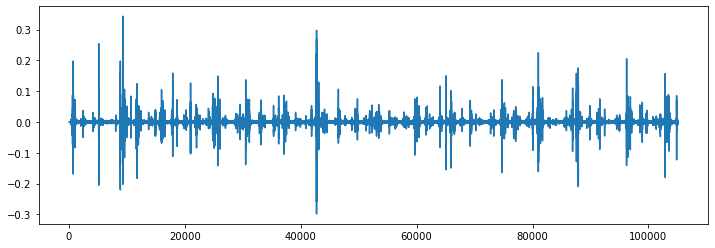

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [9]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [11]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [ -34, -122],
       [-151, -210],
       [ -46, -147]], dtype=int16)

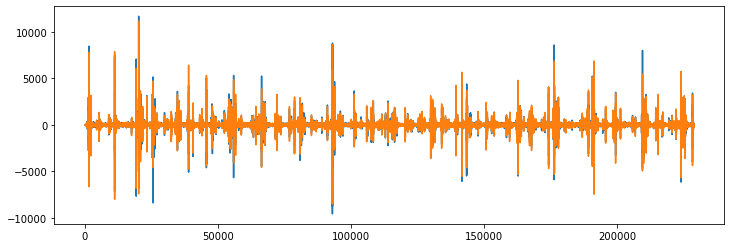

In [13]:
import matplotlib.pyplot as plt

# Original audio in stereo
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [15]:
# MFCC Extraction begin here 
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 206)


In [17]:
mfccs

array([[-322.37927   , -194.54909   , -201.7275    , ..., -287.69464   ,
        -334.10144   , -321.154     ],
       [  26.095478  ,   14.779293  ,   10.973787  , ...,   30.242895  ,
          18.90788   ,   11.457586  ],
       [ -31.343065  ,  -37.679855  ,  -47.912388  , ...,  -75.198685  ,
         -51.10906   ,  -59.65719   ],
       ...,
       [  -1.3024895 ,   -0.7278209 ,   -3.1311774 , ...,   -3.404589  ,
          -4.672339  ,   -4.1576457 ],
       [  -5.919607  ,   -7.8238487 ,   -8.107117  , ...,   -3.5696568 ,
          -4.830085  ,   -1.1150858 ],
       [   1.7500935 ,   -1.1831523 ,   -1.8647119 , ...,   -0.87912554,
           2.3141668 ,    6.3177958 ]], dtype=float32)

In [49]:
audio_dataset_path='datasets'
metadata=pd.read_csv('metadata.csv')
metadata.head(5)

,file_name,classID,class
0,drinking_1,1,drinking
1,drinking_2,1,drinking
2,drinking_3,1,drinking
3,drinking_4,1,drinking
4,drinking_5,1,drinking


In [34]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [45]:
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_name"]))
    print(file_name)

20it [00:00, 6682.55it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_1
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_2
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_3
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_4
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_5
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_6
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_7
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_8
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_9
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_10
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\audioModel\datasets\drinking_11
C:\Users

In [51]:
# Loop for extracting
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_name"])+'.wav')
    print(file_name)
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

4it [00:00, 34.28it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_1.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_2.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_3.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_4.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_5.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_6.wav


8it [00:00, 20.00it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_7.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_8.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_9.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_10.wav


13it [00:00, 17.09it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_11.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_12.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_13.wav


15it [00:00, 16.71it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_14.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_15.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_16.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_17.wav


20it [00:01, 17.04it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_18.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_19.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_20.wav


In [57]:
# converting extracted spectral features of drinking to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[-328.13235, 65.59392, -38.67034, 5.4069195, -...",drinking
1,"[-349.1521, 42.501, -31.456572, 26.431646, -8....",drinking
2,"[-320.457, 63.11254, -37.251663, 11.011499, -7...",drinking
3,"[-372.14014, 41.927353, -35.56491, 37.086433, ...",drinking
4,"[-391.85886, 51.45333, -27.665045, 38.51123, -...",drinking
5,"[-393.057, 52.509537, -32.272507, 42.311592, -...",drinking
6,"[-369.73642, 54.400322, -21.231102, 18.65339, ...",drinking
7,"[-367.96658, 33.382534, -21.234934, 23.701822,...",drinking
8,"[-374.245, 40.232742, -26.485298, 29.021275, -...",drinking
9,"[-329.38553, 47.81891, -35.86021, 9.928306, -2...",drinking


In [55]:
# Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
X.shape

(20, 40)

In [58]:
y

array(['drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking'],
      dtype='<U8')

In [68]:
### MODEL TRAINING from here onwards ###
!pip install tensorflow

In [85]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
y

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [76]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 

In [78]:
X_train

array([[-3.3676266e+02,  5.3060535e+01, -3.8876198e+01,  1.7740116e+01,
        -8.9406509e+00,  2.2221554e+01, -1.1528532e+01,  1.1821549e+01,
        -1.3507489e+01,  1.3194666e+01, -1.6175522e+01,  1.5547215e+01,
        -1.0392396e+01,  9.4173689e+00, -8.0933399e+00,  6.3999209e+00,
        -5.2069626e+00,  6.8366055e+00, -9.8582354e+00,  5.3241696e+00,
        -7.1470957e+00,  2.5498838e+00, -5.8774195e+00,  1.6071595e+00,
        -5.3120255e+00,  8.4570915e-01, -4.1688504e+00,  1.7489129e+00,
        -3.9337523e+00,  1.8954214e+00, -4.8113670e+00,  4.0606380e-01,
        -3.4943874e+00,  3.4077978e-01, -3.5476573e+00, -1.3851688e+00,
        -3.0343950e+00, -9.7178411e-01, -1.7176894e+00, -1.0333227e+00],
       [-3.4450635e+02,  5.8096485e+01, -3.4995861e+01,  1.6915621e+01,
        -1.2276897e+01,  2.2376663e+01, -8.9187679e+00,  1.0703016e+01,
        -1.3971826e+01,  1.2438839e+01, -1.6245640e+01,  1.4178749e+01,
        -9.7464371e+00,  8.4439411e+00, -8.1437120e+00,  7.2373

In [80]:
X_train.shape

(16, 40)

In [82]:
y_train

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [84]:
y_train.shape

(16, 1)

In [88]:
import tensorflow as tf 
print(tf.__version__)

2.8.0


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [92]:
### No of classes
num_labels=y.shape[1]

In [94]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [97]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [99]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [101]:
# Trianing... 
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='models/drinking_rec.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1: val_loss improved from inf to 0.00000, saving model to models\drinking_rec.hdf5
1/1 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2: val_loss did not improve from 0.00000
1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.00000
1/1 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4: val_loss did

Epoch 30/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 30: val_loss did not improve from 0.00000
1/1 [==============================] - 0s 35ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 31/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 31: val_loss did not improve from 0.00000
1/1 [==============================] - 0s 35ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 32/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 32: val_loss did not improve from 0.00000
1/1 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 33/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 33: val_loss did not improve from 0.00000
1/1 [===

1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 59: val_loss did not improve from 0.00000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 60/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 60: val_loss did not improve from 0.00000
1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 61/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 61: val_loss did not improve from 0.00000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 62/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 62: val_loss did not improve from 0.00000
1/1 [================

1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 88: val_loss did not improve from 0.00000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 89/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 89: val_loss did not improve from 0.00000
1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 90/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 90: val_loss did not improve from 0.00000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 91/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 91: val_loss did not improve from 0.00000
1/1 [================

In [104]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

1.0


In [117]:
filename='datasets/drinking_10.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

# prediction_feature=features_extractor(filename)
# prediction_feature=prediction_feature.reshape(-1,1)
# model.predict_classes(prediction_feature)
# (model.predict(x_test) > 0.5).astype("int32")

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print("\nShape: ", mfccs_scaled_features.shape)
predicted_label=(model.predict(mfccs_scaled_features) > 0.5).astype("int32")
print("Predicted Label: ", predicted_label)


[-3.2938553e+02  4.7818909e+01 -3.5860210e+01  9.9283056e+00
 -2.1170235e+00  1.9934494e+01 -1.4892680e+01  1.7025797e+01
 -1.3913389e+01  1.3266860e+01 -1.5906913e+01  1.5169565e+01
 -1.0385574e+01  1.1119023e+01 -7.5598631e+00  7.5504498e+00
 -5.9597239e+00  7.6691594e+00 -1.0503463e+01  6.1603656e+00
 -8.8434572e+00  5.7380013e+00 -8.3843470e+00  3.6919188e+00
 -4.0361733e+00 -3.5683247e-01 -2.5326853e+00  2.2540942e-01
 -3.8110096e+00  9.6741432e-01 -4.7174978e+00  1.0185846e+00
 -4.3056769e+00 -1.8192650e-01 -3.4944746e+00 -2.4642441e+00
 -2.9513855e+00 -1.2810459e+00 -3.1537955e+00 -8.4257841e-02]

Shape:  (1, 40)
Predicted Label:  [[1]]
